1. Importing necessary libraries

In [1]:
import pandas as pd # for data manipulation and analysis
import numpy as np # for working with arrays and carrying out mathematical operations
import re# In-built regular expressions library
import seaborn as sns
import matplotlib.pyplot as plt # for plotting
from matplotlib import style
style.use('ggplot')

from textblob import TextBlob # TextBlob - Python library for processing textual data

from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

import warnings
warnings.filterwarnings('ignore')

from wordcloud import WordCloud # WordCloud - Python linrary for creating image wordclouds

Loading the dataset

In [2]:
df = pd.read_csv(r"C:\Users\hp\Desktop\Dataset\tweets.csv", encoding="Latin")
df.head()

Target          ID                          Date      flag           User  \
0       0  1467810672  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY  scotthamilton   
1       0  1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY       mattycus   
2       0  1467811184  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY        ElleCTF   
3       0  1467811193  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY         Karoli   
4       0  1467811372  Mon Apr 06 22:20:00 PDT 2009  NO_QUERY       joy_wolf   

                                                Text  
0  is upset that he can't update his Facebook by ...  
1  @Kenichan I dived many times for the ball. Man...  
2    my whole body feels itchy and like its on fire   
3  @nationwideclass no, it's not behaving at all....  
4                      @Kwesidei not the whole crew

2. Data Cleaning

In [3]:
# Get number of rows and columns
df.shape

(1048575, 6)

In [4]:
# Check for "NaN" values
df.isnull().sum()

Target    0
ID        0
Date      0
flag      0
User      0
Text      0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   Target  1048575 non-null  int64 
 1   ID      1048575 non-null  int64 
 2   Date    1048575 non-null  object
 3   flag    1048575 non-null  object
 4   User    1048575 non-null  object
 5   Text    1048575 non-null  object
dtypes: int64(2), object(4)
memory usage: 48.0+ MB


In [6]:
# Drop unwanted columns
df.drop(['Target','ID', 'Date', 'flag', 'User'], axis=1, inplace=True)

In [7]:
df.head()

Text
0  is upset that he can't update his Facebook by ...
1  @Kenichan I dived many times for the ball. Man...
2    my whole body feels itchy and like its on fire 
3  @nationwideclass no, it's not behaving at all....
4                      @Kwesidei not the whole crew

In [8]:
print(df['Text'].iloc[0],"\n")
print(df['Text'].iloc[1],"\n")
print(df['Text'].iloc[2],"\n")

is upset that he can't update his Facebook by texting it... and might cry as a result  School today also. Blah! 

@Kenichan I dived many times for the ball. Managed to save 50%  The rest go out of bounds 

my whole body feels itchy and like its on fire  



3. Preprocessing the texts (tweets)

This involves cleaning the "Text" column by removing special characters, hyperlink and stemming The purpose of stemming is to reduce words to their base or root form. 
For example stemming reduces words like "texting," "texted," and "texter" to the common stem "text." 

In [9]:
def cleanupText(text):
    text = text.lower()
    text = re.sub(r'@[\w]*', ' ', text) # remove @ users/mentions
    text = re.sub(r'#', '', text) #removes the "#"
    text = re.sub(r'RT[\s]+', ' ', text) # removes RT
    text = re.sub(r'https?:\/\/S+', ' ', text) # removes the hyperlink
    text = re.sub(r'[^a-zA-Z#]', ' ', text) # special characters
    text_tokens = word_tokenize(text)
    filtered_text = [w for w in text_tokens if not w in stop_words]
    return " ".join(filtered_text)
    return txt    

In [10]:
df['Clean_Text'] = df['Text'].apply(cleanupText)

In [11]:
stemmer = PorterStemmer()
def stemming(data):
    text = [stemmer.stem(word) for word in data]
    return data

In [12]:
df['Clean_Text'] = df['Clean_Text'].apply(lambda x: stemming(x))

In [13]:
df.head()

Text  \
0  is upset that he can't update his Facebook by ...   
1  @Kenichan I dived many times for the ball. Man...   
2    my whole body feels itchy and like its on fire    
3  @nationwideclass no, it's not behaving at all....   
4                      @Kwesidei not the whole crew    

                                          Clean_Text  
0  upset update facebook texting might cry result...  
1  dived many times ball managed save rest go bounds  
2                   whole body feels itchy like fire  
3                                   behaving mad see  
4                                         whole crew

In [14]:
print(df['Text'].iloc[0],"\n")
print(df['Text'].iloc[1],"\n")
print(df['Text'].iloc[2],"\n")

is upset that he can't update his Facebook by texting it... and might cry as a result  School today also. Blah! 

@Kenichan I dived many times for the ball. Managed to save 50%  The rest go out of bounds 

my whole body feels itchy and like its on fire  



4. Sentiment Analysis

In [15]:
# Create function to obtain Polarity Score
def polarity(Text):
    return TextBlob(Text).sentiment.polarity

In [16]:
# Create function to obtain Sentiment category
def sentiment(polarity):
    if polarity <0:
        return "Negative"
    elif polarity ==0:
        return "Neutral"
    elif polarity>0:
        return "Positive"

In [17]:
# Apply all functions above to respective columns
df['Polarity'] = df['Clean_Text'].apply(polarity)
df['Sentiment']= df['Polarity'].apply(sentiment) 

In [18]:
df.head()

Text  \
0  is upset that he can't update his Facebook by ...   
1  @Kenichan I dived many times for the ball. Man...   
2    my whole body feels itchy and like its on fire    
3  @nationwideclass no, it's not behaving at all....   
4                      @Kwesidei not the whole crew    

                                          Clean_Text  Polarity Sentiment  
0  upset update facebook texting might cry result...     0.000   Neutral  
1  dived many times ball managed save rest go bounds     0.500  Positive  
2                   whole body feels itchy like fire     0.200  Positive  
3                                   behaving mad see    -0.625  Negative  
4                                         whole crew     0.200  Positive

5. Exploratory Data Analysis

In this section, the purpose was to show the sentiment distributions, the positive, negative and neutral most commomly used words. I also made use of WordCloud, MatPlotlib and Seaborn to visualize this task.

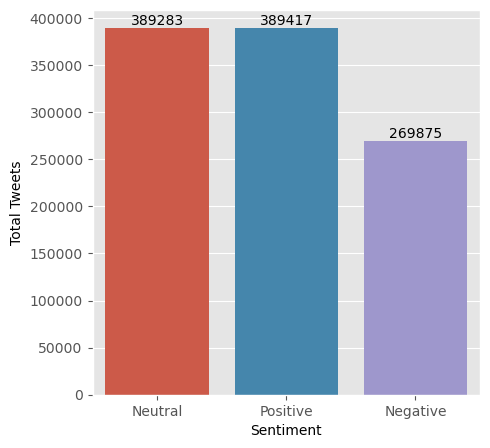

In [20]:
Sentiment_dist = df['Sentiment'].value_counts().rename_axis('Sentiment').to_frame('Total Tweets').reset_index()

# Plotting the distribution
fig, ax = plt.subplots(figsize=(5,5))
ax = sns.countplot(x="Sentiment", data=df)
plt.xlabel('Sentiment')
plt.ylabel('Total Tweets') 
ax.bar_label(ax.containers[0])

plt.show()

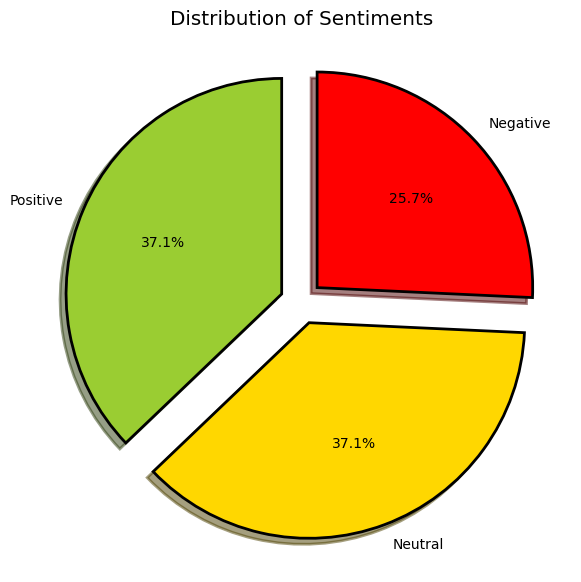

In [21]:
fig = plt.figure(figsize=(7, 7))
colors = ("yellowgreen", "gold", "red")
wp = {'linewidth': 2, 'edgecolor': "black"}
tags = df['Sentiment'].value_counts()
explode = (0.1, 0.1, 0.1)
tags.plot(kind='pie', autopct='%1.1f%%', shadow=True, colors=colors,
          startangle=90, wedgeprops=wp, explode=explode, label='')

plt.title('Distribution of Sentiments')  

plt.savefig('distributionofsentiments.png')
plt.show()

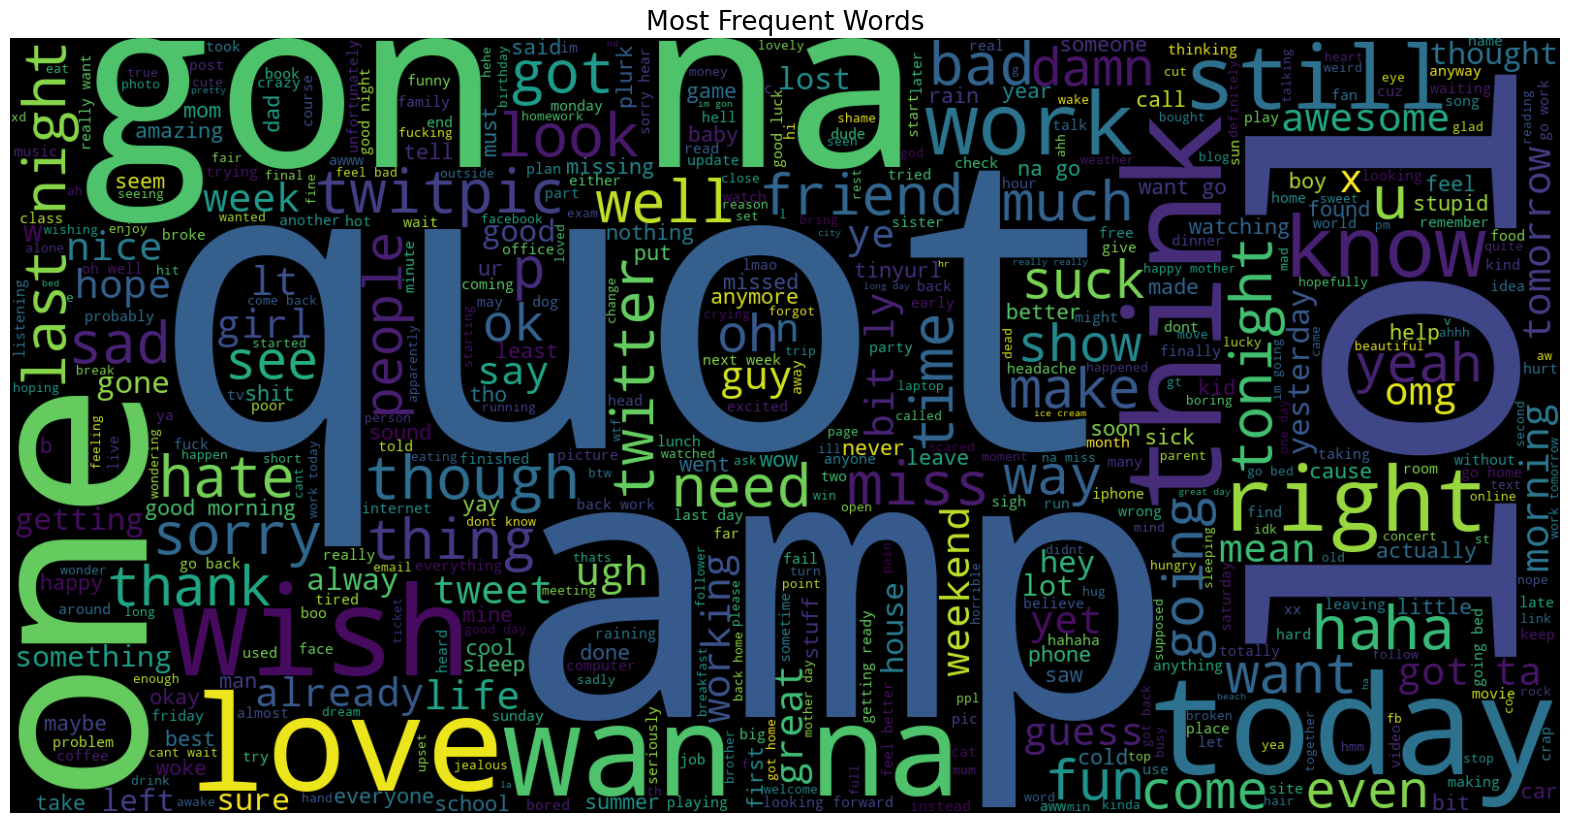

In [22]:
# visualize the most frequently words
text = " ".join([word for word in df['Clean_Text']])

wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)

# plot the graph
plt.figure(figsize=(20,15), facecolor='None')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Frequent Words', fontsize=19)


plt.show()

In [23]:
pos_texts = df[df.Sentiment == 'Positive']
pos_texts = pos_texts.sort_values(['Polarity'], ascending= False)
pos_texts.head()

Text  \
703368  England is such a rainy, rainy place  best wra...   
187637  I just had the best god damn dream ever! Until...   
830212  Noooo, school tomorrow ): Havent miss it at al...   
911193                      bowling with cousins  awesome   
314249     @taylorcassidy me too  but it looks awesome!!!   

                                               Clean_Text  Polarity Sentiment  
703368  england rainy rainy place best wrap gon na cur...       1.0  Positive  
187637      best god damn dream ever woke anyone care hug       1.0  Positive  
830212  noooo school tomorrow havent miss weell sitt n...       1.0  Positive  
911193                            bowling cousins awesome       1.0  Positive  
314249                                      looks awesome       1.0  Positive

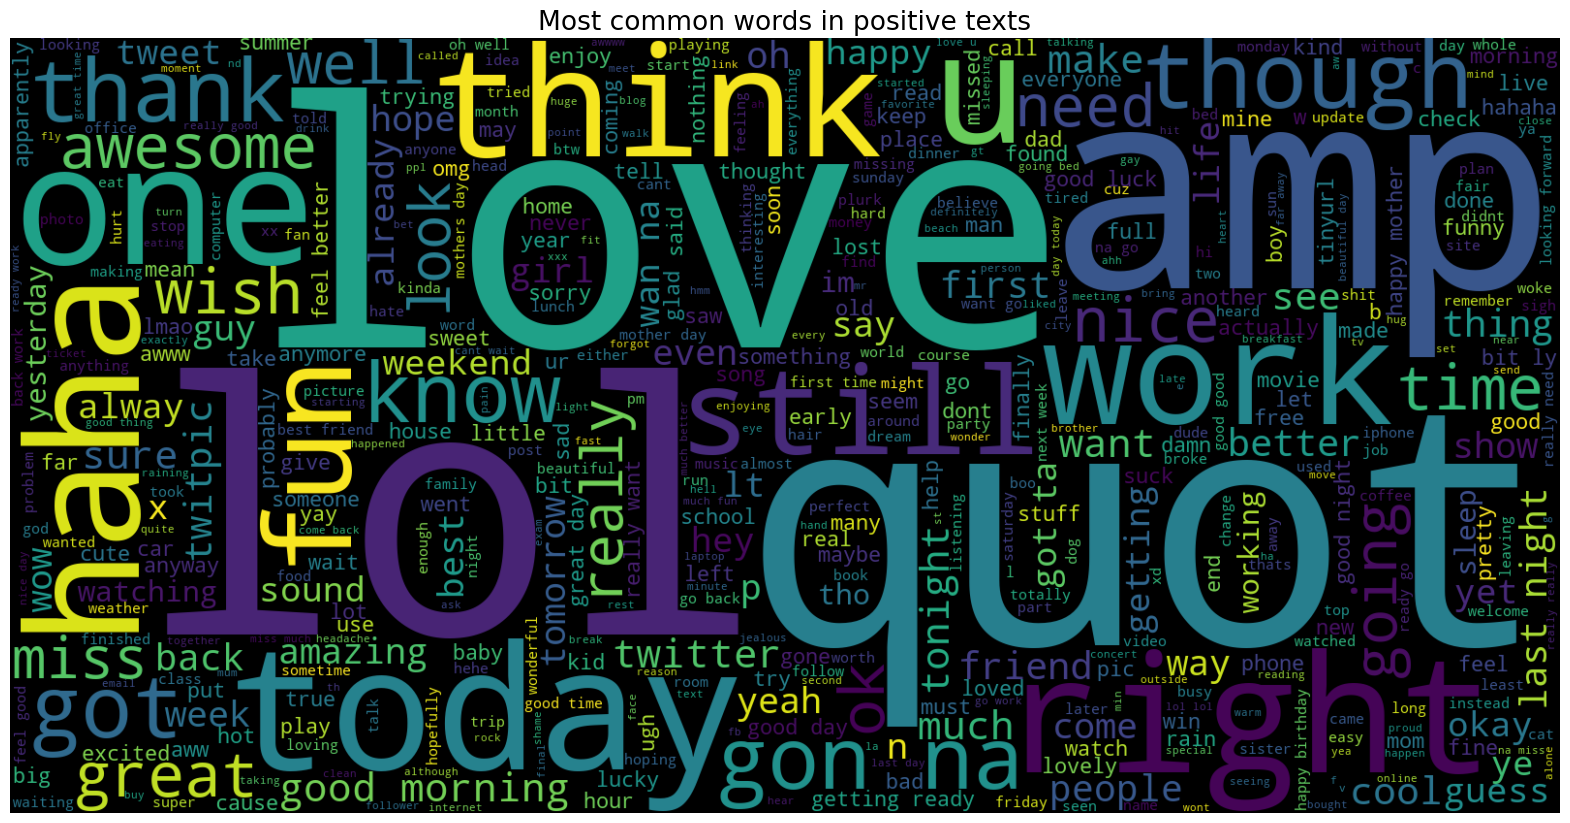

In [24]:
text = ' '.join([word for word in pos_texts['Clean_Text']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most common words in positive texts', fontsize=19)

# Save the image
plt.savefig('wordcloud_positive_texts.png', bbox_inches='tight')
plt.show()

In [25]:
neg_texts = df[df.Sentiment == 'Negative']
neg_texts = neg_texts.sort_values(['Polarity'], ascending= False)
neg_texts.head()

Text  \
53865   Oh shit I remember this boss fight from my fir...   
357817  so tired. its sat alrdy, time pass by so fast ...   
154059  What's worse than not being able to have a Big...   
107821  I'm worn out and sweaty. Alas there was no nak...   
64888   Tired of everyone fighting. Just be mature adu...   

                                               Clean_Text      Polarity  \
53865   oh shit remember boss fight first playthrough ... -4.625929e-18   
357817  tired sat alrdy time pass fast wen u hav fun a... -5.551115e-18   
154059               worse able big mac empty big mac box -5.551115e-18   
107821  worn sweaty alas naked fun involved pity cause... -5.551115e-18   
64888   tired everyone fighting mature adults suck gos... -6.938894e-18   

       Sentiment  
53865   Negative  
357817  Negative  
154059  Negative  
107821  Negative  
64888   Negative

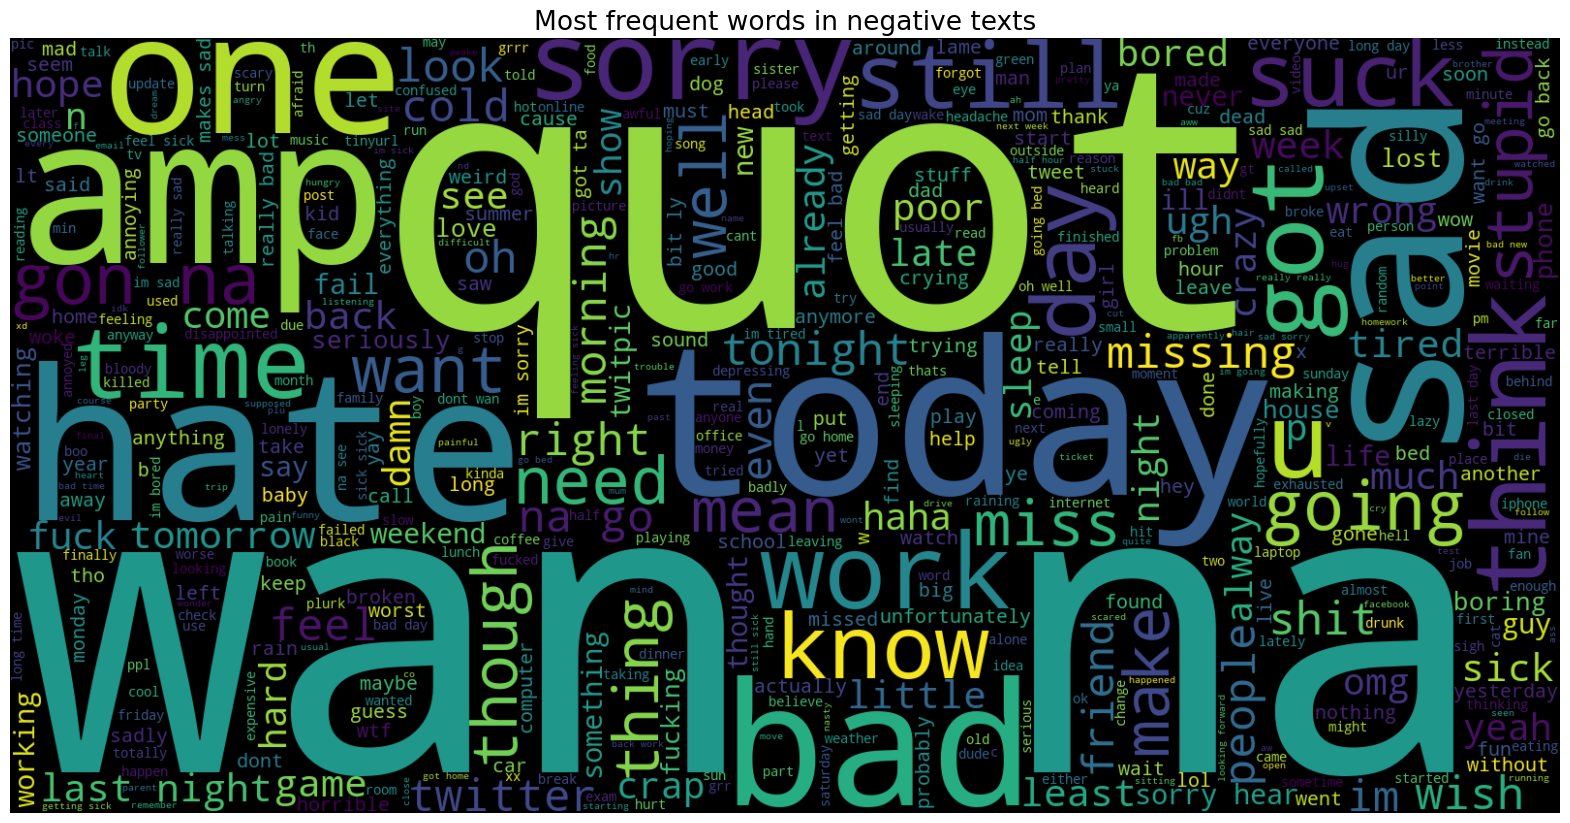

In [26]:
text = ' '.join([word for word in neg_texts['Clean_Text']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in negative texts', fontsize=19)
plt.show()

In [27]:
neutral_texts = df[df.Sentiment == 'Neutral']
neutral_texts = neutral_texts.sort_values(['Polarity'], ascending= False)
neutral_texts.head()

Text  \
0       is upset that he can't update his Facebook by ...   
682593                                  @geetar65 I know    
682616  fell asleep at 2 am. woke ip at 8 am.... on a ...   
682614                suffering with a baaad... hangover    
682613            http://twitpic.com/7vr34 - i miss this    

                                               Clean_Text  Polarity Sentiment  
0       upset update facebook texting might cry result...       0.0   Neutral  
682593                                               know       0.0   Neutral  
682616                 fell asleep woke ip saturday balls       0.0   Neutral  
682614                           suffering baaad hangover       0.0   Neutral  
682613                           http twitpic com vr miss       0.0   Neutral

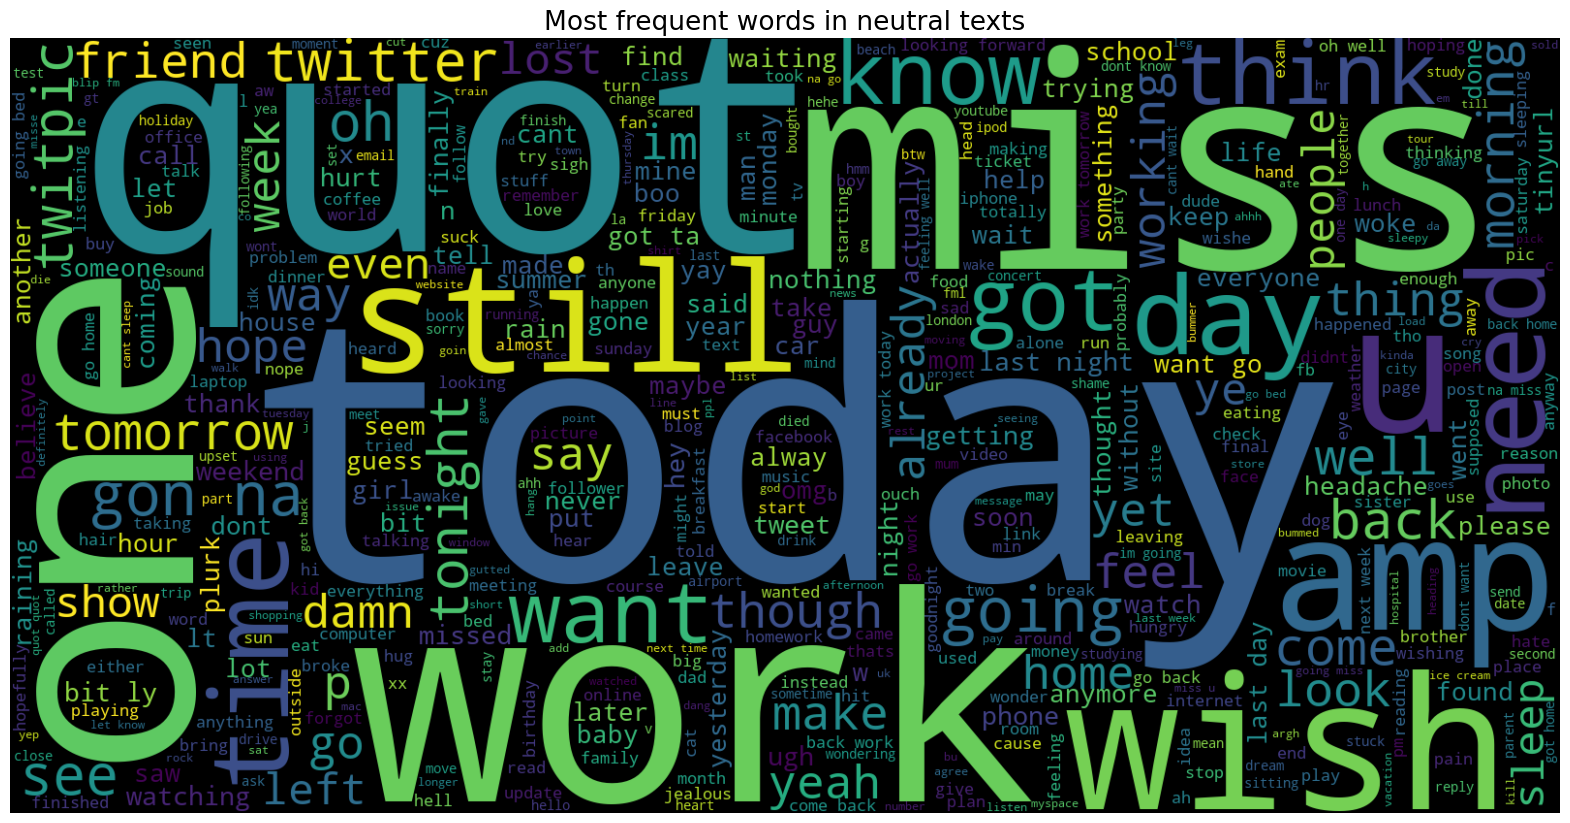

In [28]:
text = ' '.join([word for word in neutral_texts['Clean_Text']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in neutral texts', fontsize=19)
plt.show()